# 2019 AI Index Report Research
Sources:
* 2019 AI Index Report: https://hai.stanford.edu/ai-index/2019
* Chapter 4.2. CAPIQ, CB, Quid - Investment Activity. Access data: https://drive.google.com/open?id=1eh3lTT-k80rorlCz-M-BtmDKX-79kWZsDF3TH6_sAJo

In [11]:
import pandas as pd
pd.options.display.float_format = '{:,.0f}'.format

In [12]:
data = pd.read_csv("startups.csv")
data.head()

,Unnamed: 0,Date of Funding Event,Event ID,Event Type,Funding in USD,Target Company ID,countries,clusters,Target Name,isProfileOrganization,Quarter of Funding Event,Year of Funding Event
0,0,#########,"(u'9206ec6b-9781-417f-9f4c-ee0b5eab982f',)",Private Investment,"1,740,000",7209132c-1d54-447f-9a91-0a21f5d084f7,Italy,"Crypto, Wealth management, Traders, Cryptocurr...",Kellify,True,3,2018
1,1,#########,"(u'15a9e239-9456-4425-8812-b5d35fda2fe5',)",Private Investment,"600,000",11cfdaea-d72e-404b-948d-890d6e958387,Canada,"Sentiment, Customer feedback, Employee experie...",Swae,True,2,2018
2,2,#########,"(u'f1eca2f1-61a2-8262-911b-8b57d9f751b0',)",Private Investment,0,8b9ca8b8-9f58-da0f-d4dd-eed5e34a2cbc,United Kingdom,"Invoices, Medium businesses, Cash flow, Receipts",Crystal Apps Ltd.,True,1,2017
3,3,#########,"(u'40b45f91-8bc2-3c34-982e-b4914c80745e',)",Private Investment,"1,131,601",8b9ca8b8-9f58-da0f-d4dd-eed5e34a2cbc,United Kingdom,"Invoices, Medium businesses, Cash flow, Receipts",Crystal Apps Ltd.,True,2,2016
4,4,#########,"(u'416170cc-06ae-ca2a-3be0-d56552246ed7',)",Private Investment,"218,623",8b9ca8b8-9f58-da0f-d4dd-eed5e34a2cbc,United Kingdom,"Invoices, Medium businesses, Cash flow, Receipts",Crystal Apps Ltd.,True,1,2016


In [13]:
data.drop(data.columns[0], axis=1, inplace=True)
data.drop(columns=['Date of Funding Event', 'Event ID', 'Event Type', 
                   'Target Company ID', 'isProfileOrganization'], inplace=True)
data.head()

,Funding in USD,countries,clusters,Target Name,Quarter of Funding Event,Year of Funding Event
0,"1,740,000",Italy,"Crypto, Wealth management, Traders, Cryptocurr...",Kellify,3,2018
1,"600,000",Canada,"Sentiment, Customer feedback, Employee experie...",Swae,2,2018
2,0,United Kingdom,"Invoices, Medium businesses, Cash flow, Receipts",Crystal Apps Ltd.,1,2017
3,"1,131,601",United Kingdom,"Invoices, Medium businesses, Cash flow, Receipts",Crystal Apps Ltd.,2,2016
4,"218,623",United Kingdom,"Invoices, Medium businesses, Cash flow, Receipts",Crystal Apps Ltd.,1,2016


In [14]:
data_sec = data[data['clusters'].str.contains("Cybersecurity")].copy()
data_sec.sort_values(['Funding in USD'], ascending=[False]);

In [15]:
data_sec.describe(include='all')

,Funding in USD,countries,clusters,Target Name,Quarter of Funding Event,Year of Funding Event
count,567,567,567,567,567,567
unique,nan,25,1,244,nan,nan
top,nan,United States,"Threat, Network security, Cybersecurity, Secur...",Interset,nan,nan
freq,nan,327,567,9,nan,nan
mean,"24,910,980",NaN,NaN,NaN,2,"2,016"
std,"188,888,112",NaN,NaN,NaN,1,2
min,0,NaN,NaN,NaN,1,"2,009"
25%,"507,523",NaN,NaN,NaN,1,"2,015"
50%,"3,200,000",NaN,NaN,NaN,2,"2,017"
75%,"11,161,232",NaN,NaN,NaN,3,"2,018"


In [16]:
# 'clusters' row has 1 unique element
data_sec.drop(columns=['clusters'], inplace=True)
data_sec.head()

,Funding in USD,countries,Target Name,Quarter of Funding Event,Year of Funding Event
64,"1,121,284",Austria,nymea.io,2,2017
201,"1,073,422",France,DATADOME SAS,1,2017
202,"3,117,985",France,DATADOME SAS,1,2018
308,"2,880,000",China,"Beijing Jiesi Security Technology Co., Ltd.",4,2018
344,"17,000,000",United States,"Cequence Security, Inc.",1,2019


In [17]:
data_sec.groupby('Target Name').count()[['Funding in USD']].sort_values(['Funding in USD'], ascending=[False]).head()

,Funding in USD
Target Name,
Interset,9
Cylance Inc.,8
Nexthink S.A.,6
Darktrace Limited,6
"Elastica, Inc.",6


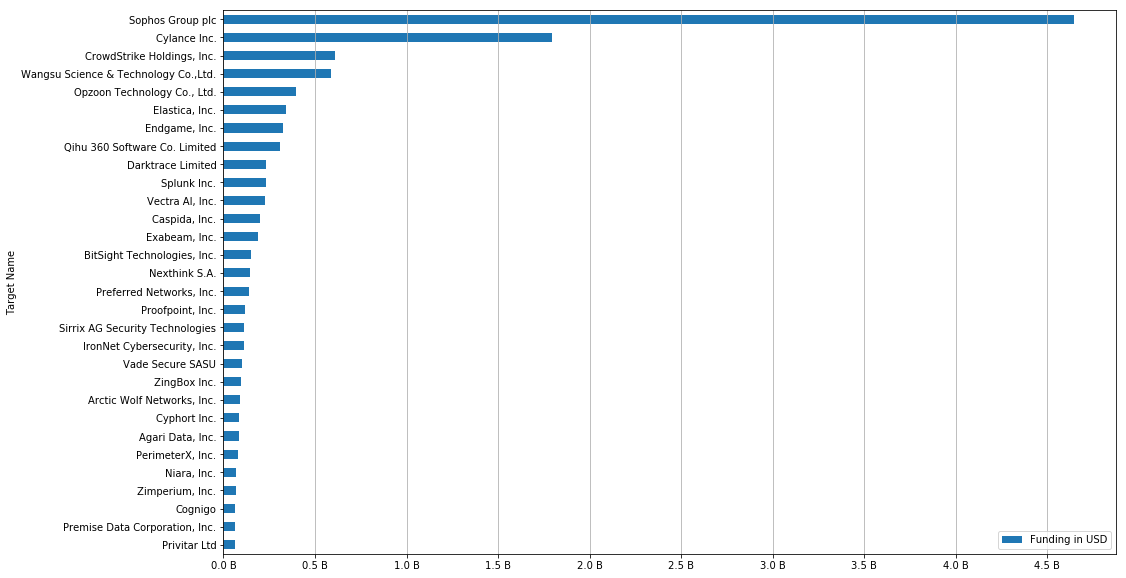

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

plt.rcParams['figure.figsize'] = [16, 10]
plt.locator_params(axis='x', nbins=10)
xticks = [str(i*0.5) + ' B' for i in range(0,10)]
ax = plt.gca()
plot_data = data_sec.groupby('Target Name')[['Funding in USD']].sum().sort_values(['Funding in USD'], ascending=[True]).tail(30)
plot_data.plot.barh(ax=ax)
ax.grid(axis = 'x')
ax.set_xticklabels(xticks);

In [19]:
data_sec.groupby('Target Name')[['Funding in USD']].sum().sort_values(['Funding in USD'], ascending=[False]).to_csv("cybersecurity_startups.csv")

In [20]:
df = pd.read_csv("cybersecurity_startups.csv")
df.head(10)

,Target Name,Funding in USD
0,Sophos Group plc,"4,644,000,000"
1,Cylance Inc.,"1,796,999,854"
2,"CrowdStrike Holdings, Inc.","612,000,000"
3,"Wangsu Science & Technology Co.,Ltd.","587,834,114"
4,"Opzoon Technology Co., Ltd.","399,000,000"
5,"Elastica, Inc.","341,423,468"
6,"Endgame, Inc.","324,296,671"
7,Qihu 360 Software Co. Limited,"311,000,000"
8,Darktrace Limited,"230,500,000"
9,Splunk Inc.,"230,000,000"
